In [1]:
from os.path import join, dirname, abspath

import pickle

import matplotlib.pyplot as plt

from resite.postprocessing.results import ResiteResults


### Load results

In [50]:
main_case = "0.5_relaxed"
cases = ["20201030_182932", "20201030_182627"] #["0_full", "1_month", "2_week", "3_day"]

runs = dict.fromkeys(cases)
results = dict.fromkeys(cases)
for case in cases:
    #fn = f"../../output/paper/resite/{main_case}/{case}/resite_instance.p" 20201030_182439 20201030_182627
    fn = f"/home/utilisateur/Global_Grid/code/output/resite/{case}/resite_instance.p"
    run = pickle.load(open(fn, 'rb'))
    runs[case] = run
    #results[case] = ResiteResults(run)

In [51]:
print("Initial:", sum([len(v) for k, v in runs[cases[0]].tech_points_dict.items()]))
for case in cases:
    print(case)
    print("Selected:", len(runs[case].sel_tech_points_tuples))
    print("y", run.y_ds)

Initial: 18
20201030_182932
Selected: 7
y pv_utility    3.0  51.0    0.816579
              4.0  51.0    0.000000
              5.0  50.0    0.383613
                   51.0    0.000000
                   52.0    0.000000
              6.0  50.0    0.000000
                   52.0    0.000000
                   53.0    0.000000
              7.0  53.0    0.000000
wind_onshore  3.0  51.0    1.000000
              4.0  51.0    0.000000
              5.0  50.0    0.168463
                   51.0    0.276279
                   52.0    0.000000
              6.0  50.0    0.000000
                   52.0    0.000000
                   53.0    1.000000
              7.0  53.0    1.000000
dtype: float64
20201030_182627
Selected: 7
y pv_utility    3.0  51.0    0.816579
              4.0  51.0    0.000000
              5.0  50.0    0.383613
                   51.0    0.000000
                   52.0    0.000000
              6.0  50.0    0.000000
                   52.0    0.000000
             

In [8]:
for case in cases:
    result = results[case]
    result.print_summary()
    result.print_number_of_points()
    result.print_capacity()
    result.print_capacity_potential()

AttributeError: 'NoneType' object has no attribute 'print_summary'

1401


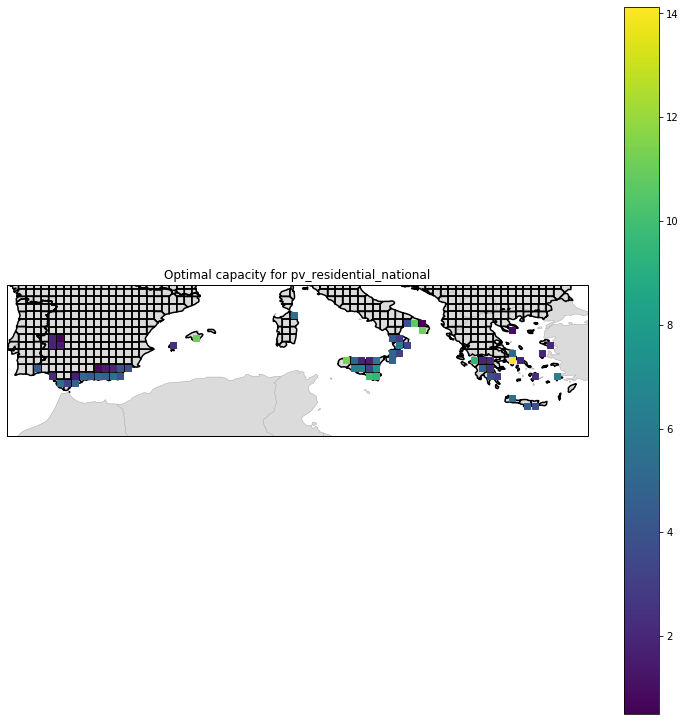

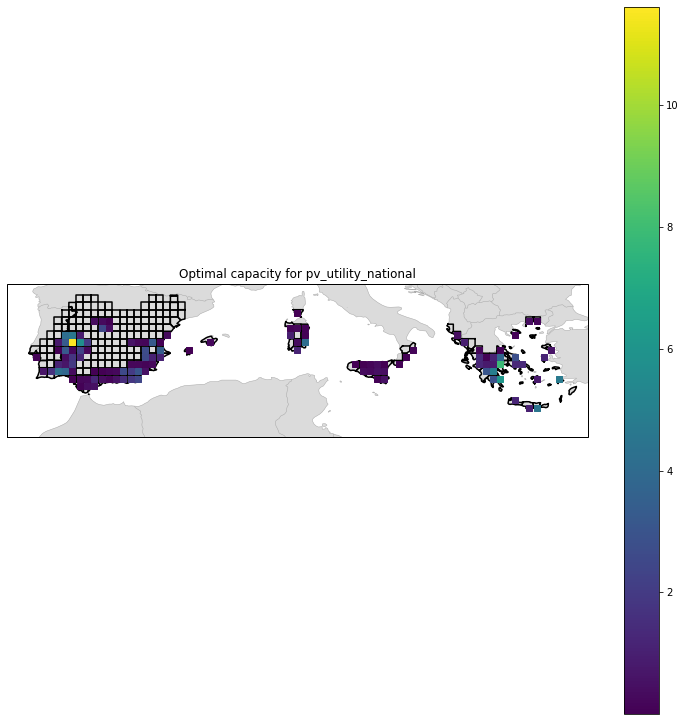

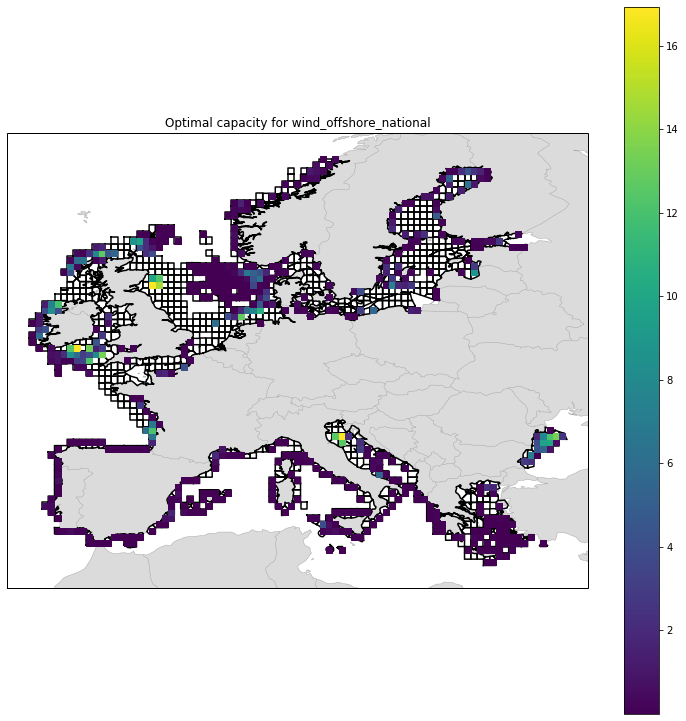

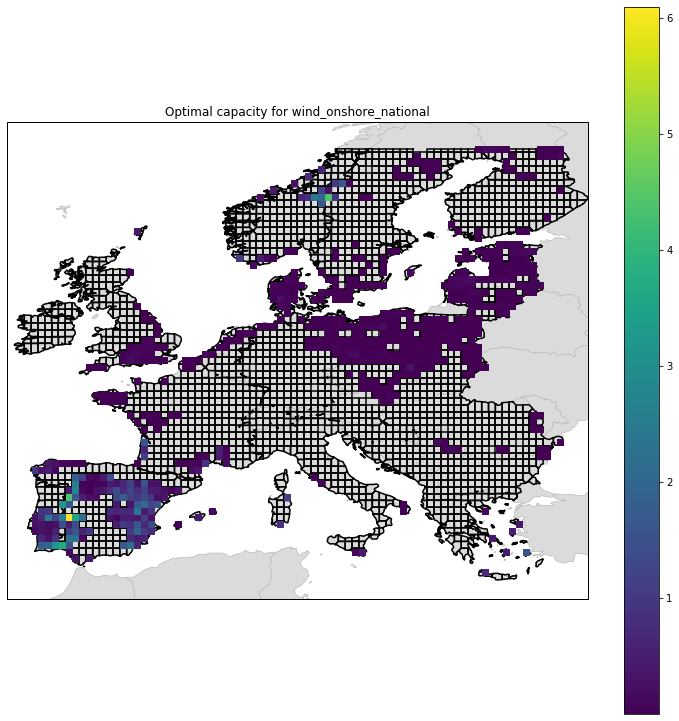

In [13]:
from pyggrid.resite.postprocessing.plot import plot_map
for case in cases[3:4]:
    run = runs[case]
    #data = run.y_ds
    #print(len(data))
    #print(len(data[data >= 1e-6]))
    data = run.data_dict["cap_potential_ds"].sort_index()*run.y_ds.sort_index()
    # print(len(data[data >= 1e-3]))
    # data -= run.data_dict["existing_cap_ds"]
    # print(len(data))
    data = data[data >= 1e-3]
    print(len(data))
    
    data_name = "Optimal capacity"
    plot_map(run, data, data_name)

Technology Name
pv_utility       0.000000
wind_onshore    10.146602
dtype: float64
10.14660220240717
2016-01-01    3.380715e+01
2016-01-02    1.228109e+02
2016-01-03    1.114118e+02
2016-01-04    4.348522e-12
2016-01-05    3.287108e+00
2016-01-06    2.039258e-12
2016-01-07    1.179214e+02
2016-01-08    9.968271e+01
2016-01-09    7.738067e+01
2016-01-10    1.254638e+02
2016-01-11    7.513577e+01
2016-01-12    1.160911e+02
2016-01-13    9.010768e+01
2016-01-14    1.202375e+02
2016-01-15    1.564782e+01
dtype: float64


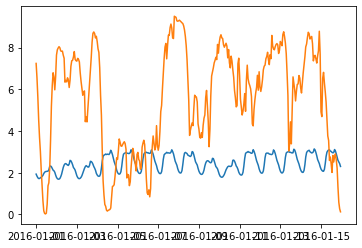

In [47]:
for case in cases:
    run = runs[case]
    load = run.data_dict["load"]*0.1
    plt.plot(load)
    optimal_cap_ds = run.data_dict["cap_potential_ds"].sort_index()*run.y_ds.sort_index()
    print(optimal_cap_ds.groupby("Technology Name").sum())
    print(optimal_cap_ds.sum())
    generation = optimal_cap_ds*run.data_dict["cap_factor_df"].sort_index(axis=1)
    max_generation = run.data_dict["cap_potential_ds"]*run.data_dict["cap_factor_df"].sort_index(axis=1)
    max_generation = max_generation.sum(axis=1)
    tot_generation = generation.sum(axis=1)
    plt.plot(tot_generation)
    #plt.plot(max_generation)
    #plt.ylim([0, 10])
    gen_grouped = tot_generation.groupby(tot_generation.index.date).sum().squeeze()
    load_grouped = load.groupby(load.index.date).sum().squeeze()
    print(gen_grouped-load_grouped)


[7.03019100e+01 0.00000000e+00 6.16142945e-02 6.16142945e-02
 1.23228589e-01 2.94516328e+01]


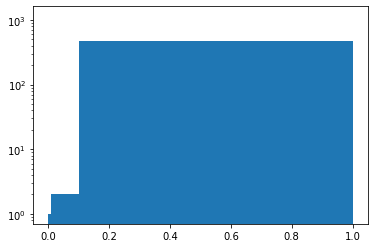

In [12]:
hist = plt.hist(run.y_ds, bins=[0, 1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1], log=True)
print(f"{hist[0]*100/hist[0].sum()}")

(array([406., 286., 531., 550., 204.]), array([0.e+00, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+02]), <a list of 5 Patch objects>)
[20.53616591 14.46636318 26.85887709 27.81992919 10.31866464]


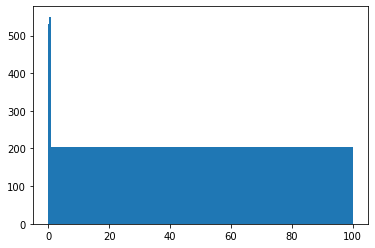

In [79]:
hist = plt.hist(optimal_cap_ds, bins=[0, 1e-3, 1e-2, 1e-1, 1, 100])
print(hist)
print(f"{hist[0]*100/hist[0].sum()}")